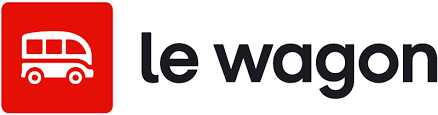

# Intro to Modeling

## Loading dataset

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = sns.load_dataset("tips")

print(df.shape)
df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Define X and y

In [37]:
# Features (independent variables) 2D array
X = df.drop(columns='tip')

# Target (dependent variable) 1D arrat
y = df['tip']

# Train-Test Split

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((183, 6), (61, 6), (183,), (61,))

In [40]:
display(X_train.head(10))

,total_bill,sex,smoker,day,time,size
101,15.38,Female,Yes,Fri,Dinner,2
102,44.30,Female,Yes,Sat,Dinner,3
242,17.82,Male,No,Sat,Dinner,2
177,14.48,Male,Yes,Sun,Dinner,2
23,39.42,Male,No,Sat,Dinner,4
180,34.65,Male,Yes,Sun,Dinner,4
233,10.77,Male,No,Sat,Dinner,2
163,13.81,Male,No,Sun,Dinner,2
172,7.25,Male,Yes,Sun,Dinner,2
162,16.21,Female,No,Sun,Dinner,3


# Data Prep

## One Hot Encoder

In [41]:
# Identify the -- categorical -- variables
X_train.head(2)

,total_bill,sex,smoker,day,time,size
101,15.38,Female,Yes,Fri,Dinner,2
102,44.30,Female,Yes,Sat,Dinner,3


In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 101 to 165
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  183 non-null    float64 
 1   sex         183 non-null    category
 2   smoker      183 non-null    category
 3   day         183 non-null    category
 4   time        183 non-null    category
 5   size        183 non-null    int64   
dtypes: category(4), float64(1), int64(1)
memory usage: 5.6 KB


In [43]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
ohe_values_train = ohe.fit_transform(X_train[['sex', 'day', 'smoker', 'time']])
ohe_values_train

array([[1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [44]:
ohe_df_train = pd.DataFrame(ohe_values_train, columns=ohe.get_feature_names_out())
ohe_df_train.head()

,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Label Encoder

In [45]:
# Identify the -- target -- variable

y_train.head(5)

,tip
101,3.00
102,2.50
242,1.75
177,2.00
23,7.58


It is a regression task, the target is already numerical, no
need to transform it !


# Normalisation

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 101 to 165
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  183 non-null    float64 
 1   sex         183 non-null    category
 2   smoker      183 non-null    category
 3   day         183 non-null    category
 4   time        183 non-null    category
 5   size        183 non-null    int64   
dtypes: category(4), float64(1), int64(1)
memory usage: 5.6 KB


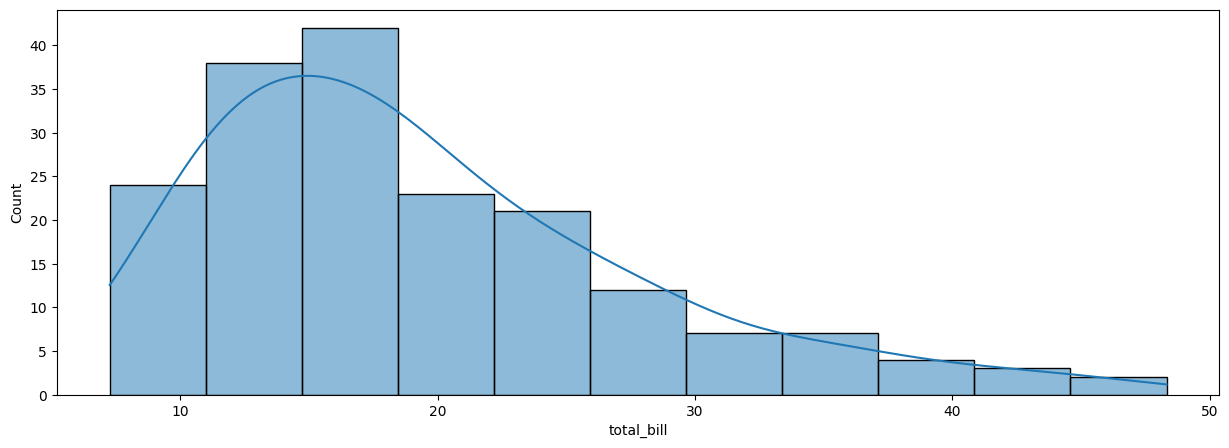

In [47]:
plt.figure(figsize=(15,5))
sns.histplot(X_train['total_bill'], kde=True)
plt.show()

## Standard Scaler

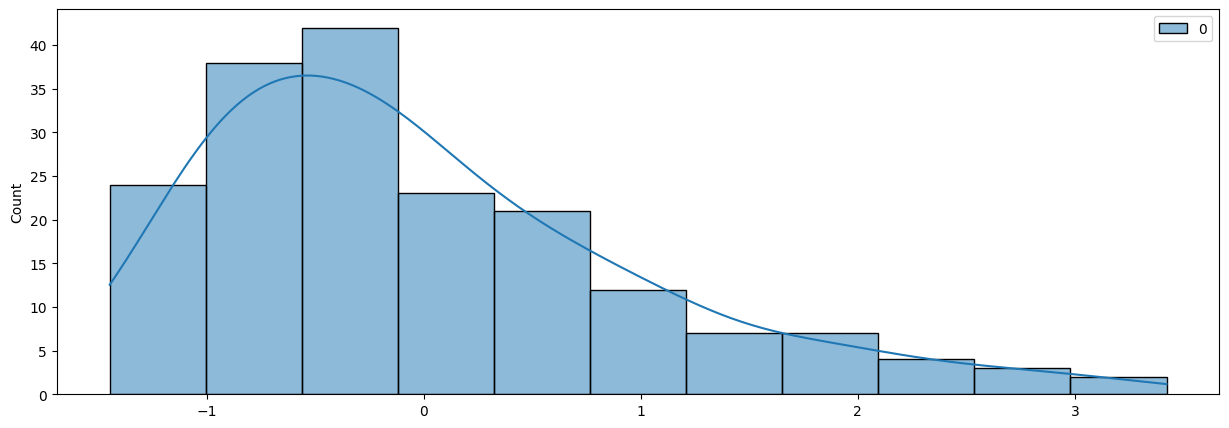

In [48]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
bills_scaled_train = std_scaler.fit_transform(X_train[['total_bill']])

plt.figure(figsize=(15,5))
sns.histplot(bills_scaled_train, kde=True)
plt.show()

In [49]:
bills_scaled_train = pd.DataFrame(bills_scaled_train, columns = ['total_bill'])

In [50]:
bills_scaled_train

,total_bill
0,-0.482852
1,2.944675
2,-0.193669
3,-0.589518
4,2.366310
...,...
178,-0.731739
179,1.256986
180,-0.852627
181,1.127801


## MinMaxScaler

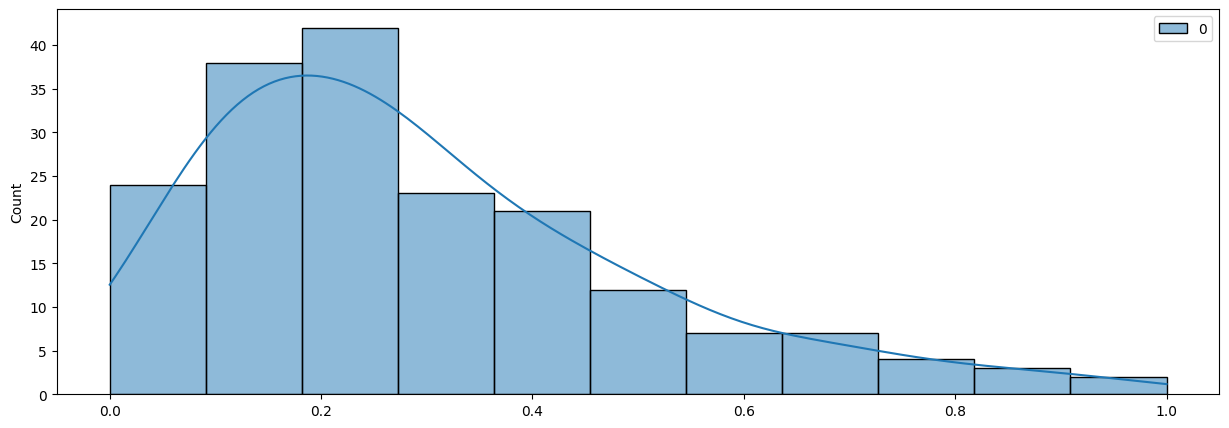

In [51]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
bills_minmax_scaled_train = minmax_scaler.fit_transform(X_train[['total_bill']])

plt.figure(figsize=(15,5))
sns.histplot(bills_minmax_scaled_train, kde=True)
plt.show()

## Concatenation of the numerical and non numerical values

In [52]:
X_train_mod = ohe_df_train.join(bills_scaled_train, how="inner")
X_train_mod.head()

,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,time_Dinner,time_Lunch,total_bill
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.482852
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.944675
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.193669
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-0.589518
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.366310


# Fitting the model

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_mod,y_train)

LinearRegression()

# Scoring the model

First, we need to prepare the data to match the train data.

In [54]:
# transforming the non numerical data
ohe_values_test = ohe.transform(X_test[['sex', 'day', 'smoker', 'time']])
ohe_df_test = pd.DataFrame(ohe_values_test, columns=ohe.get_feature_names_out())

# transforming the numerical data
bills_scaled_test = std_scaler.transform(X_test[['total_bill']])
bills_scaled_test = pd.DataFrame(bills_scaled_test, columns = ['total_bill'])

# Concatenating the data
X_test_mod = ohe_df_test.join(bills_scaled_test, how="inner")
X_test_mod.head()



,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,time_Dinner,time_Lunch,total_bill
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.167884
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.090559
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.608694
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.202179
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.266467


In [55]:
# What does it mean ? Is it a good score, bad ?
model.score(X_test_mod,y_test)

0.545830365334306

## Predict using the model

In [56]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [59]:
X_new = pd.DataFrame({'total_bill' : 17.89, 'sex': 'Male'  , 'smoker' : 'No', 'day' : 'Sun', 'time' : 'Dinner', 'size' : 2}, index=[0])
X_new

,total_bill,sex,smoker,day,time,size
0,17.89,Male,No,Sun,Dinner,2


In [60]:
# transforming the non numerical data
ohe_values_new = ohe.transform(X_new[['sex', 'day', 'smoker', 'time']])
ohe_df_new = pd.DataFrame(ohe_values_new, columns=ohe.get_feature_names_out())

# transforming the numerical data
bills_scaled_new = std_scaler.transform(X_new[['total_bill']])
bills_scaled_new = pd.DataFrame(bills_scaled_new, columns = ['total_bill'])

# Concatenating the data
X_new_mod = ohe_df_new.join(bills_scaled_new, how="inner")
X_new_mod.head()

,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,time_Dinner,time_Lunch,total_bill
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.185373


In [61]:
model.predict(X_new_mod)

array([2.85473087])